# Global Health And Life Expectancy Analysis 

 **INTRODUCTION:**
 
 This project analyzes global health data from the World Health Organization (WHO)
 to identify how socio-economic, health, and lifestyle factors influence life expectancy
 across countries over several years.
 The analysis includes data cleaning, exploration, visualization, and deriving key insights.


 **PROBLEM STATEMENT:**
 
 Life expectancy is a key indicator of a nation’s overall health and development.
 However, it varies significantly between countries due to differences in healthcare, economy, education, and lifestyle.  
 This project aims to analyze global health data to identify the major factors influencing life expectancy across developed and
 developing countries from 2000 to 2015.  
 The goal is to understand how economic growth, health spending, education, and disease prevalence impact longevity, and 
 to provide data-driven insights that can guide public health and policy decisions.

 **OBJECTIVES:**
 
 -To explore the global trends in life expectancy from 2000 to 2015.  
 -To examine how factors such as GDP, schooling, health expenditure, and disease prevalence influence life expectancy.  
 -To compare the life expectancy patterns between developed and developing countries.  
 -To identify the strongest predictors of life expectancy using statistical and visual analysis.  
 -To derive actionable insights that can help policy makers improve global health outcomes.  

 







In [5]:
# The Python 3 environment comes with many helpful analytics libraries installed
# Here is several helpful packages to load in

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv("Life Expectancy Data.csv")
print(df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [8]:
# printing the data types of each column
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [9]:
# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
# printing the first 20 records
df.head(20) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [11]:
# printing the no of rows and columns
df.shape

(2938, 22)

In [12]:
# printing the statistical analysis
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## **Data Cleaning**

In this stage, we perform essential data cleaning steps to ensure the dataset is accurate, consistent, and ready for analysis.

1. **Checking for Duplicate Records**  
   Duplicate entries can bias results or cause incorrect aggregations.

In [13]:
# Data preprocessing steps
# finding the duplicate
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

2.**Checking for Missing (Null) Values**      
   Missing values can distort statistical analysis and visualizations.

In [14]:
# Finding the null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

3.**Renaming Columns**  
  To make column names more readable and consistent for analysis.  
  I have done this wherever necessary.  

In [15]:
# The columns names
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


To handle missing data appropriately, I used different imputation methods depending on the nature of each column:  
**Mean** → for continuous numerical columns   
**Median** → for skewed numerical data   
**Mode** → for categorical or discrete columns  

In [16]:
# Next steps are Data cleaning processes. 

In [17]:
# Wherever necessary renamed the columns 
df.rename(columns={"Life expectancy ":"Life expectancy"},inplace="True")

In [18]:
df["Life expectancy"]=df.groupby('Country')['Life expectancy'].transform(
    lambda x:x.fillna(x.median() if x.notna().any() else 0))
df["Life expectancy"].isnull().sum()



np.int64(0)

In [19]:
df['Adult Mortality']=df.groupby('Country')['Adult Mortality'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else 0))
df["Adult Mortality"].isnull().sum()
    


np.int64(0)

In [20]:
df['Alcohol']=df.groupby('Country')['Alcohol'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else 0))
df['Alcohol'].isnull().sum()

np.int64(0)

In [21]:
df['Hepatitis B']=df.groupby('Country')['Hepatitis B'].transform(
    lambda x: x.fillna(x.mean() if x.notna().any() else 0))
df['Hepatitis B'].isnull().sum()  

np.int64(0)

In [22]:
# print(df[' BMI '])
df.rename(columns={' BMI ':'BMI'},inplace="True")
df['BMI']=df.groupby('Country')['BMI'].transform(
    lambda x: x.fillna(x.mean() if x.notna().any() else 0)) 
df['BMI'].isnull().sum()

np.int64(0)

In [23]:
# print(df['Polio'])
# outliers detected take median
df['Polio']=df.groupby('Country')['Polio'].transform(
    lambda x: x.fillna(x.median()))
df['Polio'].isnull().sum()

np.int64(0)

In [24]:
# print(df['Total expenditure'])
# filling the empty columns with mean grouped by country
df['Total expenditure']=df.groupby('Country')['Total expenditure'].transform(
    lambda x: x.fillna(x.fillna(x.mean() if x.notna().any() else 0)))
# df['Total expenditure'].isnull().sum()
    
    


In [25]:
# print(df['Diphtheria '])
df.rename(columns={'Diphtheria ':'Diphtheria'},inplace="True") 
df['Diphtheria']=df.groupby('Country')['Diphtheria'].transform(
    lambda x: x.fillna(x.mean()))
# df['Diphtheria'].isnull().sum() 

In [26]:
# print(df['GDP'])
# outliers detected so take median
df['GDP']=df.groupby('Country')['GDP'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else 0))
# df['GDP'].isnull().sum()

In [27]:
# print(df['Population'])
# outliers detected so take median
df['Population']=df.groupby('Country')['Population'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else 0))
# df['Population'].isnull().sum()

In [28]:
# print(df['thinness  1-19 years'])
df.rename(columns={' thinness  1-19 years':'thinness  1-19 years'},inplace="True")
df['thinness  1-19 years']=df.groupby('Country')['thinness  1-19 years'].transform(
    lambda x:x.fillna(x.median() if x.notna().any() else 0))
# df['thinness  1-19 years'].isnull().sum()

In [29]:
df.rename(columns={' thinness 5-9 years':'thinness 5-9 years'},inplace="True")
# print(df['thinness 5-9 years'])
df['thinness 5-9 years']=df.groupby('Country')['thinness 5-9 years'].transform(
    lambda x: x.fillna(x.median() if x.notna().any() else 0))
# df['thinness 5-9 years'].isnull().sum()




In [30]:
# print(df['Income composition of resources'])
df['Income composition of resources']=df.groupby('Country')['Income composition of resources'].transform(
    lambda x:x.fillna(x.median() if x.notna().any() else 0))
df['Income composition of resources'].isnull().sum()

np.int64(0)

In [31]:
# print(df['Schooling'])
df['Schooling']=df.groupby('Country')['Schooling'].transform(
    lambda x:x.fillna(x.median() if x.notna().any() else 0))
df['Schooling'].isnull().sum()

    

np.int64(0)

In [32]:
df.rename(columns={' HIV/AIDS':'HIV/AIDS'},inplace="True")
df.rename(columns={'Measles ':'Measles'},inplace="True") 

In [33]:
# All the columns are cleaned properly
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

To enhance my analysis, I derived new columns from existing data. Creating additional features helps uncover deeper insights and relationships between variables.

In [34]:
# Deriving new columns help uncover hidden relationships and deepen insights.
# Column named mortality ratio  shows how child deaths compare to adult mortality — a good indicator of healthcare efficiency.
df.rename(columns={'under-five deaths ':'under-five deaths'},inplace="True") 
df['mortality ratio']=df['under-five deaths']/(df['Adult Mortality']+1)
print(df['mortality ratio'])
# ➡️ High ratio → poor child healthcare relative to adult population.

0       0.314394
1       0.316176
2       0.330855
3       0.340659
4       0.351449
          ...   
2933    0.058011
2934    0.057263
2935    0.540541
2936    0.056769
2937    0.058559
Name: mortality ratio, Length: 2938, dtype: float64


In [35]:
# Health efficiency index measures how efficiently a country turns its economic output (GDP) into health outcomes.
df['Health Efficiency'] = df['Life expectancy'] / (df['GDP'] + 1)
print(df['Health Efficiency'])
# Higher = better health outcomes per unit of GDP

0       0.111062
1       0.097605
2       0.094667
3       0.088679
4       0.917300
          ...   
2933    0.097284
2934    0.097942
2935    0.767802
2936    0.082425
2937    0.083887
Name: Health Efficiency, Length: 2938, dtype: float64


In [36]:
# Combines Polio and Diphtheria rates to reflect overall immunization strength.
df['Vaccination_Coverage'] = df[['Polio', 'Diphtheria']].mean(axis=1)
print(df['Vaccination_Coverage'])
# Higher = better immunization coverage, likely higher life expectancy.


0       35.5
1       60.0
2       63.0
3       67.0
4       68.0
        ... 
2933    66.0
2934    37.5
2935    72.0
2936    75.5
2937    78.0
Name: Vaccination_Coverage, Length: 2938, dtype: float64


In [37]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
mortality ratio                    0
Health Efficiency                  0
Vaccination_Coverage               0
dtype: int64



## **Exploratory Data Analysis (EDA)**

- Top ten Countries with highest average life expectancy   
- Comparison of average vaccination coverage of developed and developing countries  
- Outlier detection of life expectancy and adult moratality  


In [38]:
# Filtering or aggregating data
# To find out which countries have the highest average life expectancy based on all available years.

avg_life=df.groupby(['Country','Status'])['Life expectancy'].mean().reset_index()
# print(avg_life)
top_10=avg_life.sort_values(by='Life expectancy',ascending=False).head(10).reset_index()
print(top_10)

   index      Country      Status  Life expectancy
0     84        Japan   Developed         82.53750
1    165       Sweden   Developed         82.51875
2     75      Iceland   Developed         82.44375
3    166  Switzerland   Developed         82.33125
4     60       France  Developing         82.21875
5     82        Italy   Developed         82.18750
6    160        Spain   Developed         82.06875
7      7    Australia   Developed         81.81250
8    125       Norway   Developed         81.79375
9     30       Canada  Developing         81.68750


In [39]:
# To find whether Developed countries have higher average vaccination coverage compared to Developing countries.
vaccination_compare=df.groupby('Status')['Vaccination_Coverage'].mean().reset_index()
print(vaccination_compare)

    

       Status  Vaccination_Coverage
0   Developed             93.606445
1  Developing             79.914350


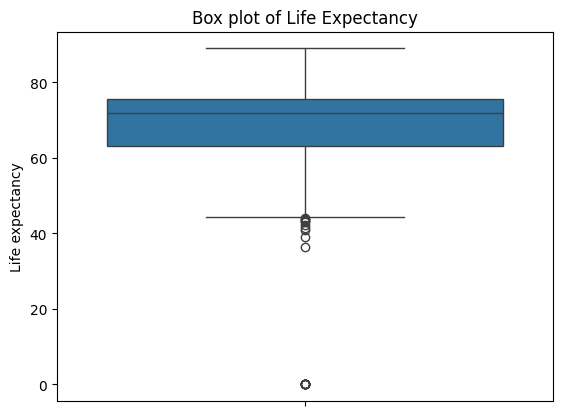

In [40]:
# box plot of life expectancy
sns.boxplot(y='Life expectancy',data=df)
plt.title("Box plot of Life Expectancy")
plt.show()

In [41]:
Q1 = df['Life expectancy'].quantile(0.25)
Q3 = df['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound:",lower_bound)
print("upper_bound",upper_bound)
outliers = df[(df['Life expectancy'] < lower_bound) | (df['Life expectancy'] > upper_bound)]
print(outliers[['Country', 'Year', 'Life expectancy']])

lower_bound: 44.10000000000001
upper_bound 94.49999999999999
                    Country  Year  Life expectancy
624            Cook Islands  2013              0.0
769                Dominica  2013              0.0
1127                  Haiti  2010             36.3
1583                 Malawi  2002             44.0
1584                 Malawi  2001             43.5
1585                 Malawi  2000             43.1
1650       Marshall Islands  2013              0.0
1715                 Monaco  2013              0.0
1812                  Nauru  2013              0.0
1909                   Niue  2013              0.0
1958                  Palau  2013              0.0
2167  Saint Kitts and Nevis  2013              0.0
2216             San Marino  2013              0.0
2307           Sierra Leone  2005             43.3
2308           Sierra Leone  2004             42.3
2309           Sierra Leone  2003             41.5
2311           Sierra Leone  2001             41.0
2312           Sierra

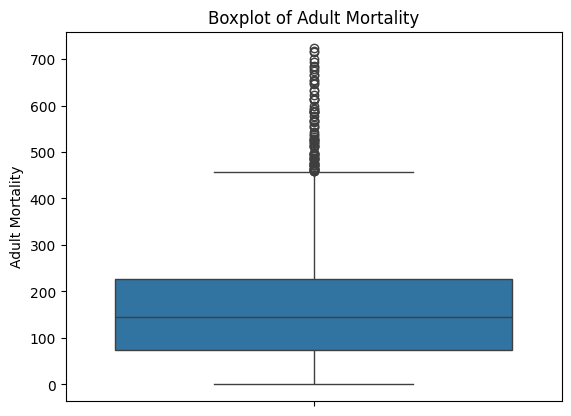

In [42]:
sns.boxplot(y='Adult Mortality', data=df)
plt.title('Boxplot of Adult Mortality')
plt.show()

In [43]:
Q1 = df['Adult Mortality'].quantile(0.25)
Q3 = df['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Adult Mortality'] < lower_bound) | (df['Adult Mortality'] > upper_bound)]
print(outliers[['Country', 'Year', 'Life expectancy','Adult Mortality']])

       Country  Year  Life expectancy  Adult Mortality
345   Botswana  2006             54.8            491.0
346   Botswana  2005             51.7            566.0
347   Botswana  2004             48.1            652.0
348   Botswana  2003             46.4            693.0
349   Botswana  2002             46.0            699.0
...        ...   ...              ...              ...
2932  Zimbabwe  2005             44.6            717.0
2933  Zimbabwe  2004             44.3            723.0
2934  Zimbabwe  2003             44.5            715.0
2936  Zimbabwe  2001             45.3            686.0
2937  Zimbabwe  2000             46.0            665.0

[85 rows x 4 columns]


In [44]:
# Statistically, these appear as outliers, but contextually, they’re valid real-world data. Removing them might hide important health patterns.

## **Data Visualization and Advanced Exploratory Data Analysis**


After Exploratory Data Analysis, we move into visualization and advanced exploratory analysis to uncover meaningful patterns, trends, and relationships among the variables influencing life expectancy.

### 1.**Exploring Relationships Between Variables**        
  We visualize bivariate relationships to identify correlations and dependencies.

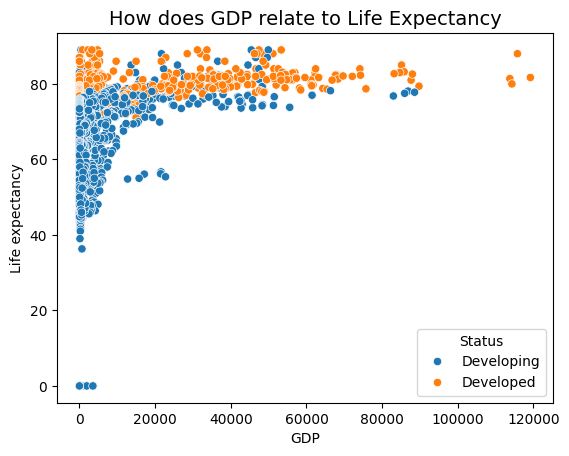

In [45]:
# How does GDP relate to Life Expectancy?
sns.scatterplot(data=df,x='GDP',y='Life expectancy',hue='Status',color='teal')
plt.title("How does GDP relate to Life Expectancy",fontsize=14)
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.show()

It is clear from the plot that Higher GDP is associated with higher life expectancy

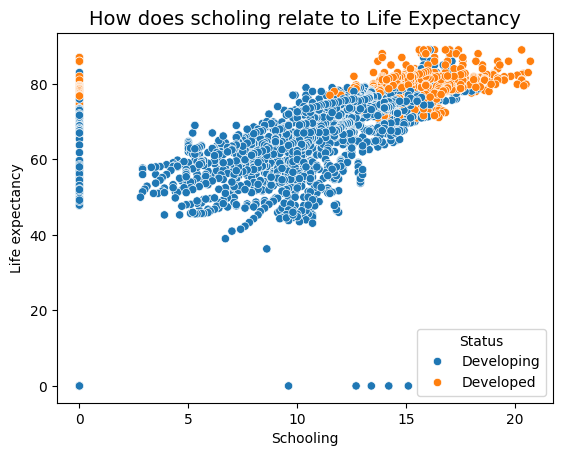

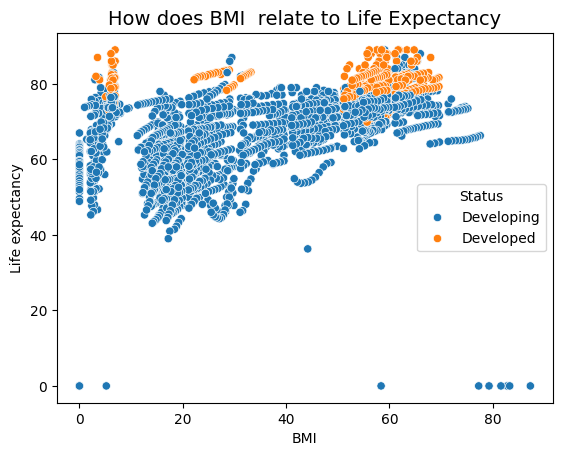

In [46]:
# Does higher schooling or BMI mean longer life?
sns.scatterplot(data=df,x='Schooling',y='Life expectancy',hue='Status',color='teal')
plt.title("How does scholing relate to Life Expectancy",fontsize=14)
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()

sns.scatterplot(data=df,x='BMI',y='Life expectancy',hue='Status',color='red')
plt.title("How does BMI  relate to Life Expectancy",fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.show()


####  Relationship Between Key Factors and Life Expectancy

The scatter plots above show how **Schooling** and **BMI** relate to **Life Expectancy**, with points colored by country status (*Developed* vs *Developing*).

##### Schooling vs Life Expectancy
- There is a **positive correlation** between schooling and life expectancy.  
- Countries with **more years of education** generally enjoy **longer life spans**.  
- The color distinction shows that **developed countries** tend to have both higher schooling and higher life expectancy compared to developing nations.

##### BMI vs Life Expectancy
- The relationship between BMI and life expectancy is more **scattered**, indicating a **weaker or non-linear relationship**.  
- Developed countries tend to have **higher BMI** along with higher life expectancy, possibly due to better healthcare mitigating lifestyle risks.  
- Developing nations often have lower BMI and lower life expectancy, reflecting **nutritional and health disparities**.

These visualizations highlight how **education and lifestyle factors** influence population health outcomes across different regions.

Education acts as a fundamental social determinant of health. Higher education often leads to higher income, better access to quality healthcare, improved health knowledge, and a greater ability to adopt and maintain a healthy lifestyle.
These countries combine strong economies, universal healthcare, and healthy lifestyles.

### 2.**Trend Analysis Over Time**  
To analyze how key health metrics evolved from 2000 to 2015, we use line plots.

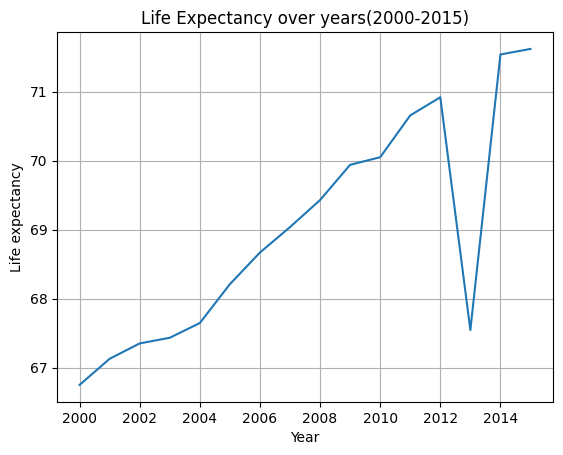

In [53]:

g_data=df.groupby('Year')['Life expectancy'].mean().reset_index()
# print(g_data)
sns.lineplot(x='Year',y='Life expectancy',data=g_data)
plt.grid(True)
plt.title("Life Expectancy over years(2000-2015)")
plt.show()

There is an abrupt drop in life expectancy for the year **2013**.In 2013, the **Life Expectancy** was $67.55$ years, which is significantly **lower than the previous year**, $2012$ ($70.92$ years), and the following year, $2014$ ($71.54$ years). This represents an unexpected drop of $3.37$ years from $2012$.Lets analyse this in detail by comparing the **Health indicators**.

In [ ]:
features =['Adult Mortality', 'infant deaths', 'HIV/AIDS', 'GDP', 'Alcohol','Life expectancy','Hepatitis B','Measles','Polio','Schooling']
g_data=df.groupby('Year')[features].mean().reset_index()
# print(g_data)
g_data.groupby('Year')[features].mean().plot(subplots=True, figsize=(10,8))
plt.suptitle("Health Factors Over Time (2000–2015)")
plt.show()


The low life expectancy in $2013$ is an anomaly because the key indicators of mortality (Adult Mortality, infant deaths, HIV/AIDS) all show improvement, which logically dictates a rise in life expectancy.It is obvious to remove the outliers that we found from the **boxplot of life expectancy**.

In [57]:
Q1 = df['Life expectancy'].quantile(0.25)
Q3 = df['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Life expectancy'] < lower_bound) | (df['Life expectancy'] > upper_bound)]
# print(outliers[['Country', 'Year', 'Life expectancy']])
df=df[~((df['Life expectancy'] == 0) & (df['Year'] == 2013))]
print(df[['Country', 'Year', 'Life expectancy']])



          Country  Year  Life expectancy
0     Afghanistan  2015             65.0
1     Afghanistan  2014             59.9
2     Afghanistan  2013             59.9
3     Afghanistan  2012             59.5
4     Afghanistan  2011             59.2
...           ...   ...              ...
2933     Zimbabwe  2004             44.3
2934     Zimbabwe  2003             44.5
2935     Zimbabwe  2002             44.8
2936     Zimbabwe  2001             45.3
2937     Zimbabwe  2000             46.0

[2928 rows x 3 columns]


In [ ]:
# 10 rows deleted successfully

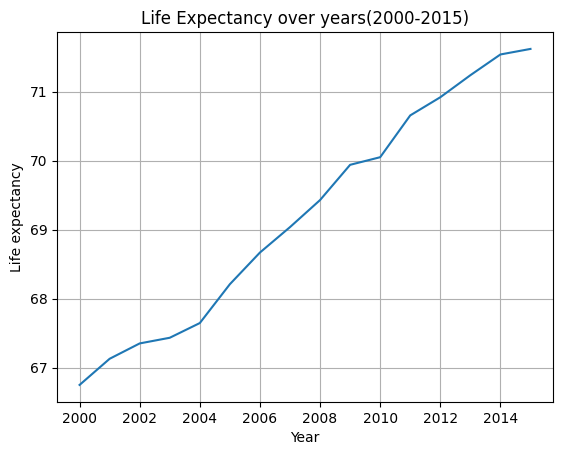

In [58]:
g_data=df.groupby('Year')['Life expectancy'].mean().reset_index()
# print(g_data)
sns.lineplot(x='Year',y='Life expectancy',data=g_data)
plt.grid(True)
plt.title("Life Expectancy over years(2000-2015)")
plt.show()

### 3.**Comparative Visualizations**

This bar chart compares the average vaccination coverage between developed and developing nations to highlight disparities in immunization and healthcare access.

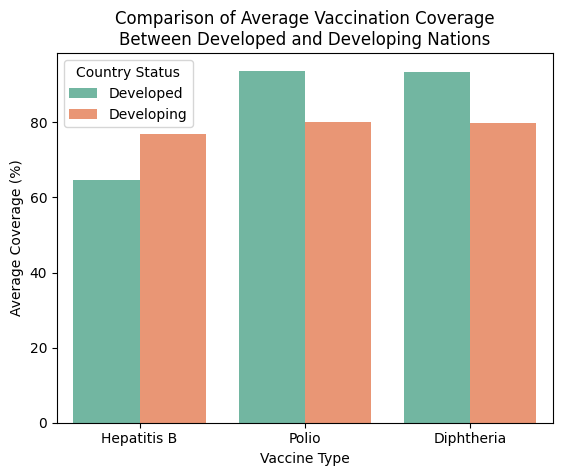

In [63]:

vaccination_features = ['Hepatitis B', 'Polio', 'Diphtheria']
vaccination_avg = df.groupby('Status')[vaccination_features].mean().reset_index()
vaccination_melted = vaccination_avg.melt(id_vars='Status',
                                          var_name='Vaccine',
                                          value_name='Average Coverage (%)')
sns.barplot(data=vaccination_melted,
            x='Vaccine', 
            y='Average Coverage (%)', 
            hue='Status',
            palette='Set2')
plt.title('Comparison of Average Vaccination Coverage\nBetween Developed and Developing Nations')
plt.xlabel('Vaccine Type')
plt.ylabel('Average Coverage (%)')
plt.legend(title='Country Status')
plt.show()


The chart shows that developed nations have higher vaccination coverage, emphasizing the need for improved immunization programs in developing countries.

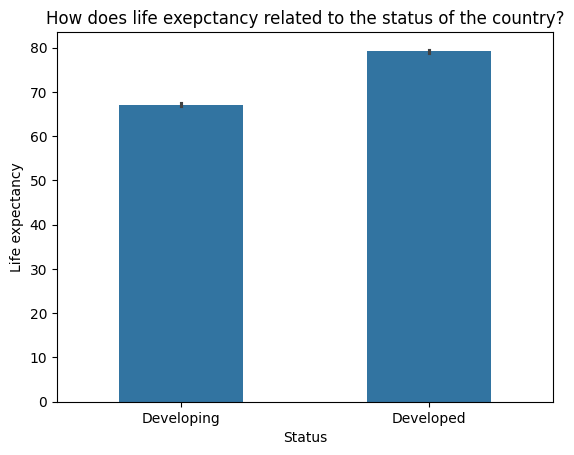

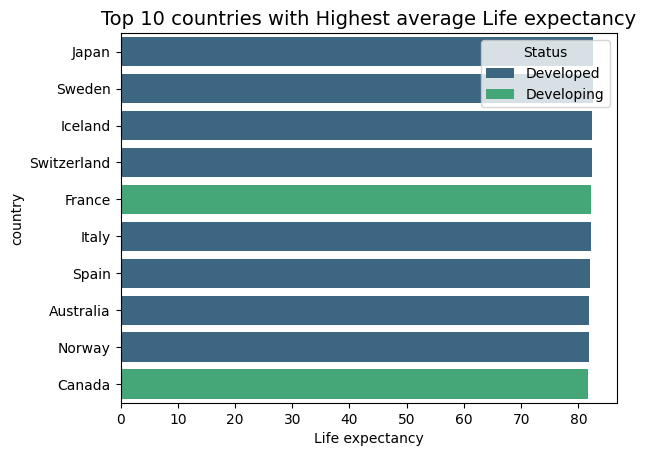

In [64]:
sns.barplot(x='Status',y='Life expectancy',data=df,width=.5)
plt.title("How does life exepctancy related to the status of the country?")
plt.show()

avg_life=df.groupby(['Country','Status'])['Life expectancy'].mean().reset_index()
top_10=avg_life.sort_values(by='Life expectancy',ascending=False).head(10).reset_index()
sns.barplot(x='Life expectancy',y='Country',data=top_10,hue='Status',palette='viridis')
plt.title("Top 10 countries with Highest average Life expectancy",fontsize=14)
plt.xlabel("Life expectancy")
plt.ylabel("country")
plt.show()

The above barcharts show developed countries have more life expectancy than developing countries.Displayed the top 10 countries with higher life expectancy,where only two developing countries come in the top 10

### 3.**Correlation Analysis**  
To understand which factors most strongly influence life expectancy,create a correlation heatmap

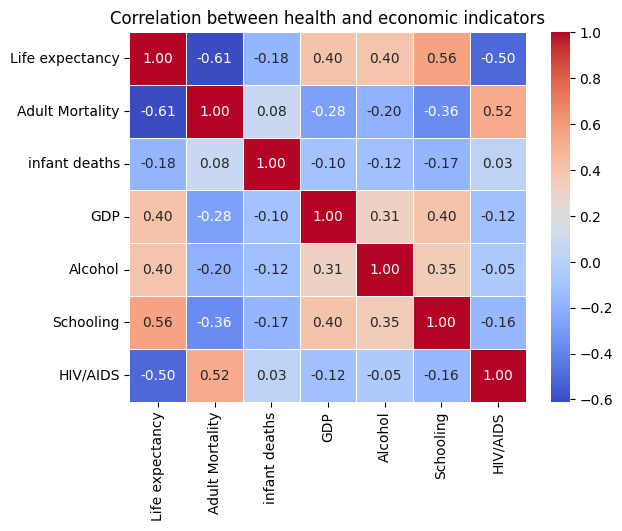

Life expectancy    1.000000
Schooling          0.561590
GDP                0.403760
Alcohol            0.399979
infant deaths     -0.175069
HIV/AIDS          -0.504904
Adult Mortality   -0.609053
Name: Life expectancy, dtype: float64


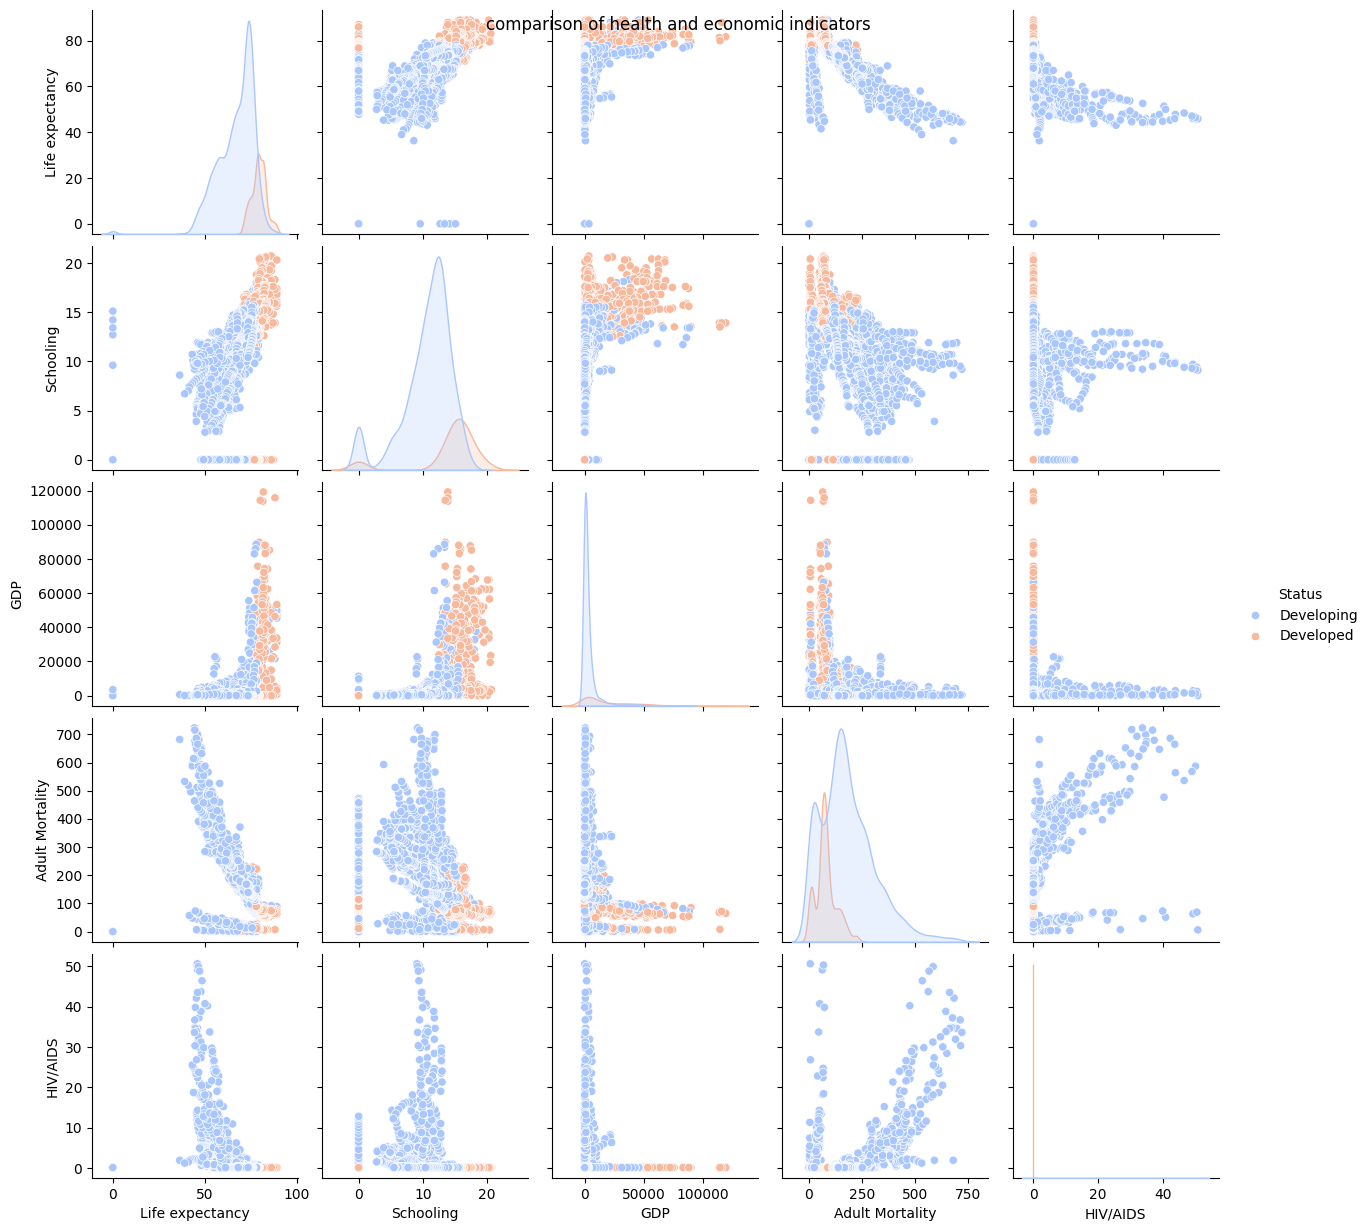

In [54]:
corr=df[['Life expectancy','Adult Mortality','infant deaths','GDP','Alcohol','Schooling','HIV/AIDS']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between health and economic indicators")
plt.show()
life_corr = corr['Life expectancy'].sort_values(ascending=False)
print(life_corr)

features = ['Life expectancy',
    'Schooling',  
    'GDP','Adult Mortality','HIV/AIDS'
]

sns.pairplot(df[features+['Status']],hue='Status',diag_kind='kde', 
    palette='coolwarm')
plt.suptitle('comparison of health and economic indicators')
plt.show()


The correlation heatmap reveals that life expectancy is positively associated with economic and social indicators such as GDP and schooling, indicating that wealthier and more educated populations tend to live longer.
Conversely, it shows strong negative correlations with adult mortality and HIV/AIDS prevalence, suggesting that higher disease burden and mortality rates significantly reduce life expectancy.
These relationships highlight the interplay between economic development, education, and health outcomes across nations.

The pair plot above visualizes the relationships between **Life Expectancy** and the most strongly correlated factors identified from the heatmap — such as **GDP**, **Schooling**, **Adult Mortality**, and **HIV/AIDS**.  

Each point represents a country (colored by its development status: *Developed* or *Developing*).  

#####  Key Insights:
- **Life Expectancy vs GDP:** Shows a clear positive trend — wealthier nations tend to have higher life expectancy.  
- **Life Expectancy vs Schooling:** Strong positive correlation — more years of education are associated with longer lifespans.  
- **Life Expectancy vs Adult Mortality:** Negative correlation — higher mortality rates reduce average life expectancy.  
- **Life Expectancy vs HIV/AIDS:** Negative trend — countries with higher HIV prevalence experience lower life expectancy.  
- The clustering of colors indicates that **developed countries generally exhibit higher GDP, schooling, and life expectancy**, whereas developing nations show the opposite.

This visualization helps confirm that **economic prosperity, education, and health outcomes** are deeply interconnected across the globe.

### 4.**Distribution Visualizations**  
 Let us compare **Alcohol consumption**, **BMI** between Developed and Developing countries using Kde plots.

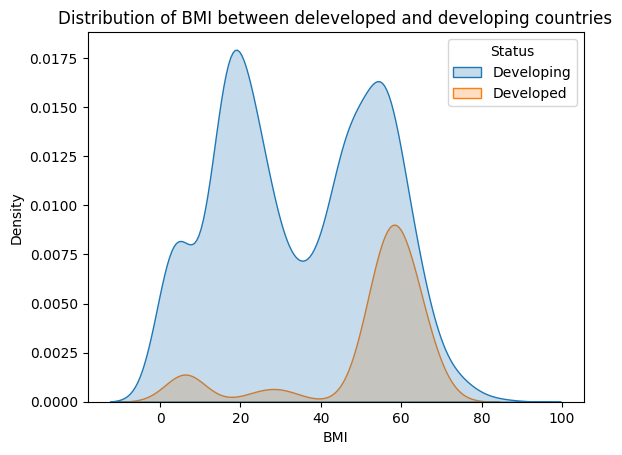

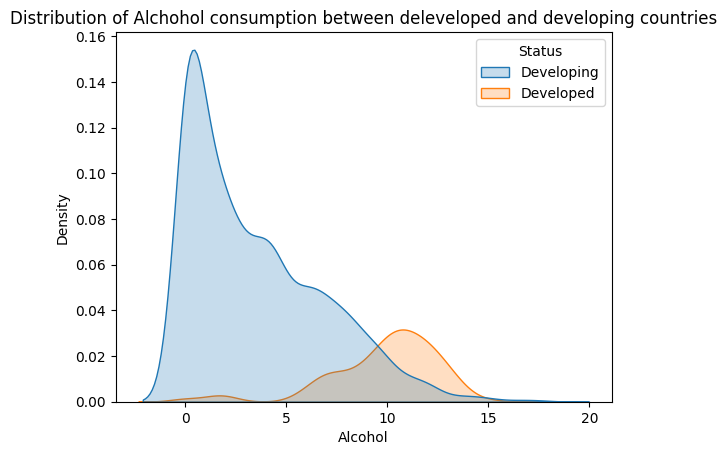

In [55]:
sns.kdeplot(data=df,x='BMI',hue='Status',fill=True)
plt.title("Distribution of BMI between deleveloped and developing countries")
plt.show()

sns.kdeplot(data=df,x='Alcohol',hue='Status',fill=True)
plt.title("Distribution of Alchohol consumption between deleveloped and developing countries")
plt.show()


####  Distribution of BMI and Alcohol Consumption

The KDE plots above illustrate how **BMI** and **Alcohol consumption** differ between *Developed* and *Developing* nations.

#####  BMI Distribution
- Developed countries generally show **higher average BMI values**, indicating higher calorie intake and sedentary lifestyles.
- Developing countries tend to have **lower BMI values**, which may reflect differences in diet, income level, and access to food.

#####  Alcohol Consumption Distribution
- Developed nations exhibit **higher alcohol consumption**, possibly linked to lifestyle and social norms.
- Developing nations show **lower alcohol consumption**, which can be influenced by cultural restrictions, affordability, or health awareness.

These density plots highlight how **lifestyle factors** differ between regions and can influence overall health outcomes, including life expectancy.

## **Insights from the Global Health and Life Expectancy Analysis**

####  1. Global Trends in Life Expectancy
- Life expectancy has generally **increased from 2000 to 2015** across most countries.  
- **Developed nations** consistently show higher life expectancy, while developing nations lag behind.  
- Although the gap is narrowing, significant **health and economic disparities** remain between regions.
  
####  2. Economic Indicators and Life Expectancy
- A **strong positive correlation** exists between **GDP** and **Life Expectancy** — wealthier countries tend to have longer lifespans.  
- This reflects how **economic growth** improves healthcare, nutrition, and living conditions.

 *Visualization used:* Scatter plot (**GDP vs Life Expectancy**)

####  3. Education and Longevity
- **Higher average years of Schooling** are linked to **higher Life Expectancy.**  
- Better education often translates to improved awareness, healthcare access, and reduced mortality rates.

 *Visualization used:* Scatter plot (**Schooling vs Life Expectancy**)  

 ####  4. Lifestyle and Health Behavior
- Moderate **Alcohol consumption** appears associated with longer life in some developed nations.  
- Extremely high or low values tend to correspond to lower life expectancy, showing the importance of balanced habits.

 *Visualization used:* KDE / Distribution plots (**Alcohol by Country Status**)

 ####  5. BMI and Health Status
- **BMI** shows a **non-linear relationship** with Life Expectancy.  
- Both underweight and obesity can reduce life expectancy, highlighting the need for **balanced nutrition**.

 *Visualization used:* Scatter plot (**BMI vs Life Expectancy**)

 #### 6. Disease and Mortality Patterns
- **Adult Mortality** and **Infant Deaths** are strongly **negatively correlated** with Life Expectancy.  
- Countries showing a **decline in HIV/AIDS** have improved life expectancy over time.

 *Visualization used:* Correlation heatmap

 #### 7. Vaccination and Health Improvements
- Nations with **higher vaccination coverage** (Hepatitis B, Polio, Diphtheria, etc.) tend to have **higher Life Expectancy.**  
- **Immunization programs** have been key drivers of global health progress.

 *Visualization used:* Bar chart comparing vaccination rates (Developed vs Developing nations)



 ####  8. Key Takeaways
- Life Expectancy is **multi-factorial**, influenced by economic, educational, and healthcare factors.  
- **Developing nations** face ongoing challenges with infectious diseases and limited healthcare access.  
- **Developed nations** deal more with lifestyle-related conditions and aging populations.  
- Continuous investment in **education, healthcare, and vaccination** is essential to improve global longevity.

## Conclusion
This analysis highlights how **economic growth, education, and healthcare access** are the strongest drivers of longer, healthier lives.  
While life expectancy has improved worldwide, **inequality between developed and developing nations persists.**  
Sustained efforts in **public health, preventive care, and education** are vital to ensure equitable and lasting improvements in global well-being.




